# How did First Time Buyers’ (FTB) Relief impact housing prices of different property types?

## Introduction

The Great Recession in 2008 demonstrated how changes to the housing market have not only economic but also social consequences. John Bone and Karen O'Reilly (2010) suggest that the recent trend of viewing the purchase of property as an investment rather than a primary place to live contributes to growing housing unaffordability. This socio-economic issue specifically concerns younger people who do not come from a privileged background and do not have substantial savings to enter the housing market. According to Nissa Finney and Albert Sabater(2022), as housing in certain areas of England and Wales becomes less affordable, it causes a generational divide in housing opportunities. Age segregation becomes more prominent, presenting challenges to social mobility. Additionally, John Bone and Karen O'Reilly (2010) mention how a larger number of individuals owning a stable home results in more sustainable communities and benefits the overall wellbeing of many families. According to Nikodem Szumilo (2018), accessible homeownership would not necessarily change wages but might potentially have positive implications for increased economic activity. 

On November 22, 2017, the UK government announced a new policy, the First Time Buyers' (FTB) Relief, which exempted first time buyers from paying a Stamp Duty Land Tax (SDLT) on an acquired house with a value of less than 300 thousand pounds and removed property tax from house purchases valued less than 500 thousand. This policy targeted the lower end of the housing market and should have increased affordability for many young individuals who were trying to get on to the property ladder (Bolster, 2011). Housing is a necessity, as people require a place to live, and demand for most necessities is inelastic. When the government removes tax burden, demand increases, as individuals must pay less. Economic theory predicts that any intervention that intends to decrease deadweight loss in the market with inelastic demand should not have a substantial effect on quantity but might largely increase the price, especially in a short run. The long term effect of the policy depends on the elasticity of supply. The supply of housing might increase because the higher prices encourage individuals to sell their property and firms to build more housing units. However, the surge in supply happens to a lesser extent in densely populated areas, where the land for new construction projects is scarce. In the long run, housing prices might fall, depending on the increase in supply. As the UK government's policy targets the lower end of the market, the price and quantity changes should happen within property market for types that are generally less expensive. Therefore, FTB Relief policy type requires clear evaluation.

This analysis uses the data provided by HM Land Registry, the non-ministerial department that monitors and documents every housing transaction in England and Wales and has an open database for all purchases since 1995 (HM Land Registry Open Data, 2023). This research paper attempts to evaluate how the FTB Relief influenced market prices and what difference it made for various types of housing. To monitor the policy effect, this exploration is limited to property transactions between March 2015 and March 2020, as the COVID-19 pandemic disrupted the economy overall. This research focuses on the Greater London area, the most populated English county that accounts for almost 13% of all property transactions in England and Wales. 

This paper highlights how the biggest price spikes happened, as economic theory predicts, in the areas of Greater London known for its affordable housing, where most property purchased consisted of newly-built flat units. According to the data, flats were the cheapest housing type, whereas detached houses qualified as the most expensive purchases. Most of the property purchased in Greater London had a price of less than 500 thousand pounds, which happens to be the upper bound value to qualify for the First Time Buyers' Relief. Between old and new housing of all types other than detached houses, the average price percent change was higher for recently built property.
Avarage price increases were not extreme for property purchased in the areas with more expensive housing.

## Data Cleaning

The dataset used in this research includes 16 variables: Transaction Identifier (each purchase has a unique value), Price Paid, Date of Transfer, Postcode, Property Type, Old/New (New Build status), Tenure, Primary Address (PAON), Secondary Address (SAON), Street, Locality, City or Town, District, County, PPD_Category Type, and Record Status(HM Land Registry Open Data, 2023). All address variables indicate the location of the sold property. Property Type specifies if it is a flat (F), detached (D), semi-detached (S), or terraced (T) house, or other type of property (O). Tenure ('Duration') can be freehold (F) or leasehold (L), a trait common in the housing market of common law countries. PPD_Category indicates whether the purchase was a Standard Price Paid entry (A) or an Additional Price Paid entry (B).

The research question focuses on the period from March 2015 to March 2020, so transactions outside this timeframe are excluded, reducing data set from 28 276 227 to 5 180 168 values. The analysis is centered on residential properties, thus only transactions for detached, semi-detached, terraced houses, and flats are considered. The filtering process removes PAON, SAON, and Record Status columns, and data where the Tenure type is unknown, as they are irrelevant to the research question. It also excludes all purchases made outside of the Greater London Area, as it is the primary region of interest. These manipulations reduce the data set to 442 443 values. To find difference in difference, treatment group (London) requires a control group. Cardiff property purchases are a control data set, representing housing market in the biggest city of Wales, where the government did not implement the FTB Relief.

The main focus of this research is to find the policy effect on the property prices, therefore making price the dependent variable. The policy requires a purchase to meet certain coditions for an individual to qualify for the tax relief, therefore Date of Transfer, Property Type, New Build status and District are independent variables that determine various sections of the housing market that could react differently to the government intervention. Date of Transfer can generate two other variables that will help analyze changes of housing prices over time. 'Before/After' variable indicates whether the property was purchased before or after the FTB Relief implementation on November 22, 2017. 'Interval' variable helps to group data for a time period of one year but setting the start point to March, as the latest data included is form March 2020. All entries with missing price values are removed. However, there are none.

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
dataset_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/202304.csv"
colnames = ['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 
            'postcode', 'Property_Type', 'Old/New', 
            'Duration', 'PAON', 'SAON', 
            'Street', 'Locality', 'Town/City', 
            'District', 'County', 'PPDCategory_Type',
            'Record_Status - monthly_file_only']

In [3]:
# Read the dataset in chunks
chunk_size = 10000
df_chunks = pd.read_csv(dataset_path, header=None, names=colnames, chunksize=chunk_size)

In [4]:
#Convert "Date_of_Transfer" to year and month
df = pd.concat([chunk.assign(Year_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.year,
                             Month_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.month) 
                for chunk in df_chunks])

In [5]:
df = df[((df['Year_of_Transfer'] == 20) & (df['Month_of_Transfer'] >= 3)) |
        ((df['Year_of_Transfer'] > 2015) & (df['Year_of_Transfer'] < 2020)) |
        ((df['Year_of_Transfer'] == 2020) & (df['Month_of_Transfer'] < 3))]

In [6]:
# Remove unnecessary columns
df_copy = df.copy()
columns_to_remove = ['PAON', 'SAON', 'Record_Status - monthly_file_only']
df_copy = df_copy.drop(columns=columns_to_remove)
df_copy = df_copy[(df_copy['Duration'] != 'U')]

In [7]:
df_copy['Date_of_Transfer'] = pd.to_datetime(df_copy['Date_of_Transfer'])
reference_date = pd.to_datetime('2017-11-22') #date when policy was implemented
# Create the 'Before/After' variable
df_copy['Before/After'] = df_copy['Date_of_Transfer'].apply(lambda x: 'Before' if x < reference_date else 'After')

In [8]:
property_types_to_keep = ['D', 'S', 'T', 'F']

In [9]:
df_cardiff = df_copy[df_copy['Property_Type'].isin(property_types_to_keep) & (df_copy['County'] == 'CARDIFF')]

In [10]:
df_copy = df_copy[df_copy['Property_Type'].isin(property_types_to_keep) & (df_copy['County'] == 'GREATER LONDON')]

In [11]:
groupby_vars = ['Property_Type', 'Old/New', 'Duration', 'Year_of_Transfer', 'Month_of_Transfer', 'Before/After']

In [12]:
#Create summary statistics

intervals = [
    ((2015, 3), (2016, 2)),
    ((2016, 3), (2017, 2)),
    ((2017, 3), (2018, 2)),
    ((2018, 3), (2019, 2)),
    ((2019, 3), (2020, 2))
]

In [13]:
# Function to determine the interval name for a given year and month
def get_interval_name(start_year, end_year):
    return f"March {start_year} - February {end_year}"

In [14]:
# Function to determine the interval for a given year and month
def get_interval(year, month):
    for i, ((start_year, start_month), (end_year, end_month)) in enumerate(intervals):
        if (year > start_year or (year == start_year and month >= start_month)) and \
           (year < end_year or (year == end_year and month <= end_month)):
            return get_interval_name(start_year, end_year)

In [15]:
# Apply the interval calculation to the DataFrame
df_copy['Interval'] = df_copy.apply(lambda x: get_interval(x['Year_of_Transfer'], x['Month_of_Transfer']), axis=1)
#DO NOT TOUCH DF GROUP ANYMORE

## Summary Statistics Table

In [47]:
# Group by Interval, Property_Type, Duration, and Old/New
grouped_df = df_copy.groupby(['County'])['price'].describe()

# Reset index to make Interval and other columns
grouped_df.reset_index(inplace=True)

# Rename columns for consistency
grouped_df.rename(columns={'mean': 'Price_Mean', '50%': 'Price_Median', 'std': 'Price_Std (Thousand £)', 'count': 'Price_Count'}, inplace=True)
grouped_df['Price_Std (Thousand £)'] /= 1000
grouped_df = pd.DataFrame(grouped_df)



# Group by Interval, Property_Type, Duration, and Old/New
grouped_df_cardiff = df_cardiff.groupby(['County'])['price'].describe()

# Reset index to make Interval and other columns
grouped_df_cardiff.reset_index(inplace=True)

# Rename columns for consistency
grouped_df_cardiff.rename(columns={'mean': 'Price_Mean', '50%': 'Price_Median', 'std': 'Price_Std (Thousand £)', 'count': 'Price_Count'}, inplace=True)
grouped_df_cardiff['Price_Std (Thousand £)'] /= 1000
grouped_df_cardiff = pd.DataFrame(grouped_df_cardiff)
grouped_df

,County,Price_Count,Price_Mean,Price_Std (Thousand £),min,25%,Price_Median,75%,max
0,GREATER LONDON,442443.0,609692.835425,843.885167,1.0,335000.0,450000.0,642500.0,160000000.0


In [46]:
grouped_df_cardiff

,County,Price_Count,Price_Mean,Price_Std (Thousand £),min,25%,Price_Median,75%,max
0,CARDIFF,25108.0,224568.349012,123.942305,500.0,145000.0,190000.0,270000.0,2000000.0


In [73]:
grouped_df_type = df_copy.groupby(['County'])['Property_Type'].describe()
grouped_df_type['percentage'] = grouped_df_type['freq']/grouped_df_type['count'] * 100
grouped_df_type

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,442443,4,F,252574,57.086224


In [68]:
grouped_df_age = df_copy.groupby(['County'])['Old/New'].describe()
grouped_df_age['percentage'] = grouped_df_age['freq']/grouped_df_age['count'] * 100
grouped_df_age

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,442443,2,N,367841,83.138619


In [69]:
grouped_df_policy = df_copy.groupby(['County'])['Before/After'].describe()
grouped_df_policy['percentage'] = grouped_df_policy['freq']/grouped_df_policy['count'] * 100
grouped_df_policy

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,442443,2,After,229825,51.944544


In [70]:
grouped_df_interval = df_copy.groupby(['County'])['Interval'].describe()
grouped_df_interval['percentage'] = grouped_df_interval['freq']/grouped_df_interval['count'] * 100
grouped_df_interval

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,442443,5,March 2016 - February 2017,114178,25.806262


In [71]:
grouped_df_type2 = df_cardiff.groupby(['County'])['Property_Type'].describe()
grouped_df_type2['percentage'] = grouped_df_type2['freq']/grouped_df_type2['count'] * 100
grouped_df_type2

,count,unique,top,freq,percentage
County,,,,,
CARDIFF,25108,4,T,9283,36.97228


In [72]:
grouped_df_age2 = df_cardiff.groupby(['County'])['Old/New'].describe()
grouped_df_age2['percentage'] = grouped_df_age2['freq']/grouped_df_age2['count'] * 100
grouped_df_age2

,count,unique,top,freq,percentage
County,,,,,
CARDIFF,25108,2,N,22957,91.433009


In [74]:
grouped_df_policy2 = df_cardiff.groupby(['County'])['Before/After'].describe()
grouped_df_policy2['percentage'] = grouped_df_policy2['freq']/grouped_df_policy2['count'] * 100
grouped_df_policy2

,count,unique,top,freq,percentage
County,,,,,
CARDIFF,25108,2,After,13880,55.281185


For purchases in Greater London area, the standard deviation of 843 thousand pounds depicts large variation in the data set. The maximum value of some property purchased is extreme 160 million, whereas upper quartile value is only 642 500, meaning that most property purchased costed less and that there is higher demand for more affordable housing. Median is lower than mean, indicating that data values are largely skewed to the right. The housing market in Cardiff follows similar trends but on a lower scale, as there is less variation and property tends to be cheaper.

Most property units purchased in Greater London were flats, whereas Cardiff experienced more sales of terraced houses. There was higher demand for old property in both cities. The number of purchases is slightly bigger after the policy implementation, with 4 and 10.6 percentage point difference for London and Cardiff respectively, indicating more quantity demaded. Londoners purchased the biggest share of property between March 2016 and February 2017, which is before the UK government introduced the FTB Relief.

The following visualisations helps to explore these tendencies further.

## Plots, Histograms, Figures

In [76]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

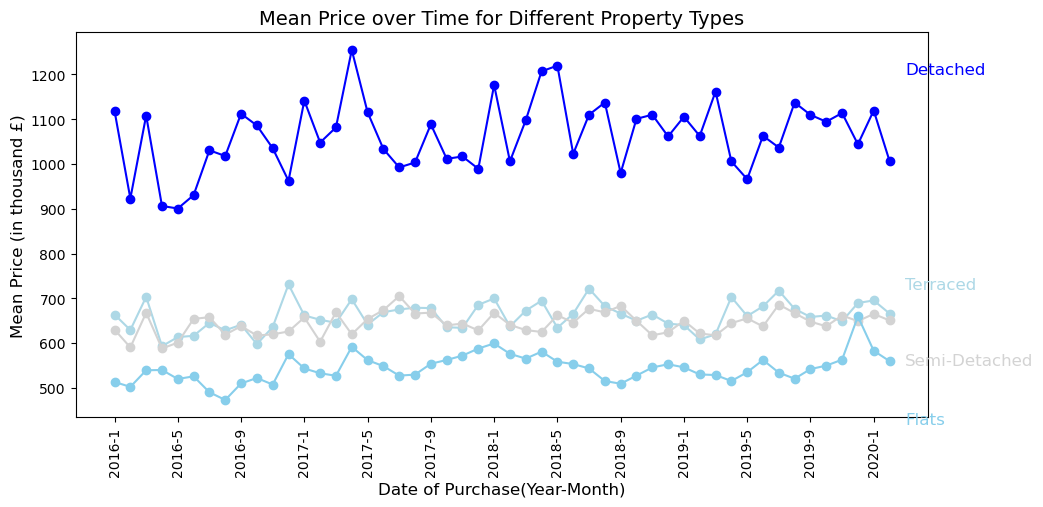

In [22]:
def plot_mean_price_over_time(df, property_types_to_keep, ax):
    color_map = {'D': 'blue', 'E': 'lightblue', 'F': 'skyblue', 'S': '#D3D3D3'}
    # Loop over each property type
    for prop_type in property_types_to_keep:
        df_filtered = df_copy[df_copy['Property_Type'] == prop_type].copy()
        # Convert 'Date_of_Transfer' to datetime
        df_filtered['Date_of_Transfer'] = pd.to_datetime(df_filtered['Date_of_Transfer'])
        # Extract year and month from 'Date_of_Transfer'
        df_filtered['Year'] = df_filtered['Date_of_Transfer'].dt.year
        df_filtered['Month'] = df_filtered['Date_of_Transfer'].dt.month
        # Group by year and month, calculate the mean price for each group
        grouped_df = df_filtered.groupby(['Year', 'Month'])['price'].mean().reset_index()
        # Convert price to thousands of pounds
        grouped_df['price'] /= 1000
        line_color = color_map.get(prop_type, 'lightblue')  
        ax.plot(grouped_df['Year'].astype(str) + '-' + grouped_df['Month'].astype(str), grouped_df['price'], marker='o', linestyle='-', label=prop_type, color=line_color)
        # Add labels on the lines
        if prop_type == 'D':
            ax.text('2015-10', 1200, 'Detached', fontsize=12, color=line_color)
        elif prop_type == 'T':
            ax.text('2015-10', 720, 'Terraced', fontsize=12, color=line_color)
        elif prop_type == 'S':
            ax.text('2015-10', 550, 'Semi-Detached', fontsize=12, color=line_color)
        elif prop_type == 'F':
            ax.text('2015-10', 420, 'Flats', fontsize=12, color=line_color)
    ax.set_xlabel('Date of Purchase(Year-Month)', fontsize=12)  # Reduced fontsize for axis label
    ax.set_ylabel('Mean Price (in thousand £)', fontsize=12)  # Reduced fontsize for axis label
    ax.set_title('Mean Price over Time for Different Property Types', fontsize=14)  # Reduced fontsize for title
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    ax.set_xticks(ax.get_xticks()[::4])
fig, ax = plt.subplots(figsize=(11, 5))
plot_mean_price_over_time(df, ['D', 'T', 'S', 'F'], ax)
plt.show()

This graph displays the average price of property sold for different types of housing. The figure clearly indicates that Detached houses are usually more expensive and purchase values experience more volatility if one compares them to Flats, Semi-detached or Terraced houses. The average price mostly increase from March 2016 and peaks in March 2017. There is another spike for detached houses between November 2017 and May 2018. There is little difference between Terraced and Semi-Detached Houses, however, Flats were sold at the lowest price on average.

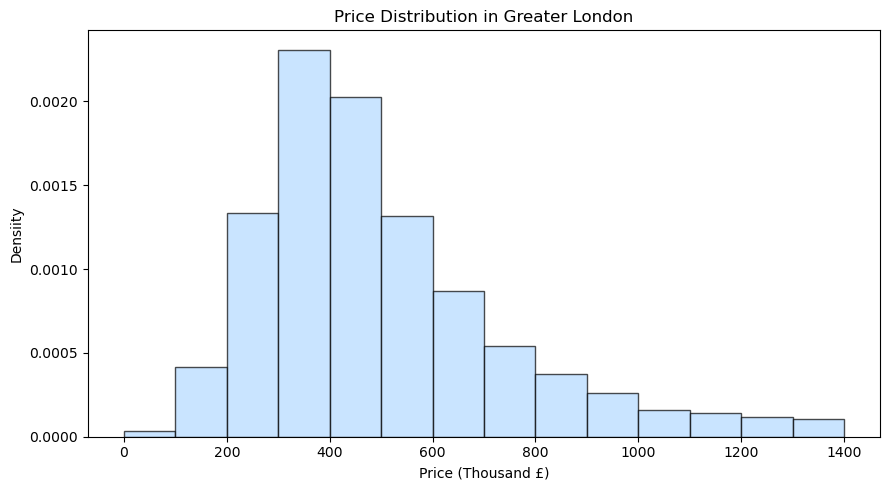

In [23]:
# Determine the 95th percentile of prices to identify outliers
price_95th_percentile = df_copy['price'].quantile(0.95)
# Filter the DataFrame to exclude outliers
df_filtered = df_copy[df_copy['price'] <= price_95th_percentile].copy()  # Ensure copy of DataFrame is made
# Convert prices to thousands for the filtered data
df_filtered.loc[:, 'price_thousands'] = df_filtered['price'] / 1000  # Use .loc[] for assignment
# Determine the minimum and maximum prices in the filtered dataset (in thousands)
min_price = df_filtered['price_thousands'].min()
max_price = df_filtered['price_thousands'].max()
bin_edges = list(range(int(min_price), int(max_price) + 100, 100)) 
plt.figure(figsize=(9, 5))
plt.hist(df_filtered['price_thousands'], bins=bin_edges, color='#b3d9ff', edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Price (Thousand £)')
plt.ylabel('Densiity')
plt.title('Price Distribution in Greater London')
plt.tight_layout()
plt.show()

This figure clearly displays distribution of property prices that were sold just in Greater London Area between March 2015 and March 2020. The chart is definitely skewed to the right and indicates that most purchases were lower than median and under the value of 800 thousand pounds. The spike in the price range between 300 and 400 thousand pounds indicates that this was the most frequent value paid for the property.

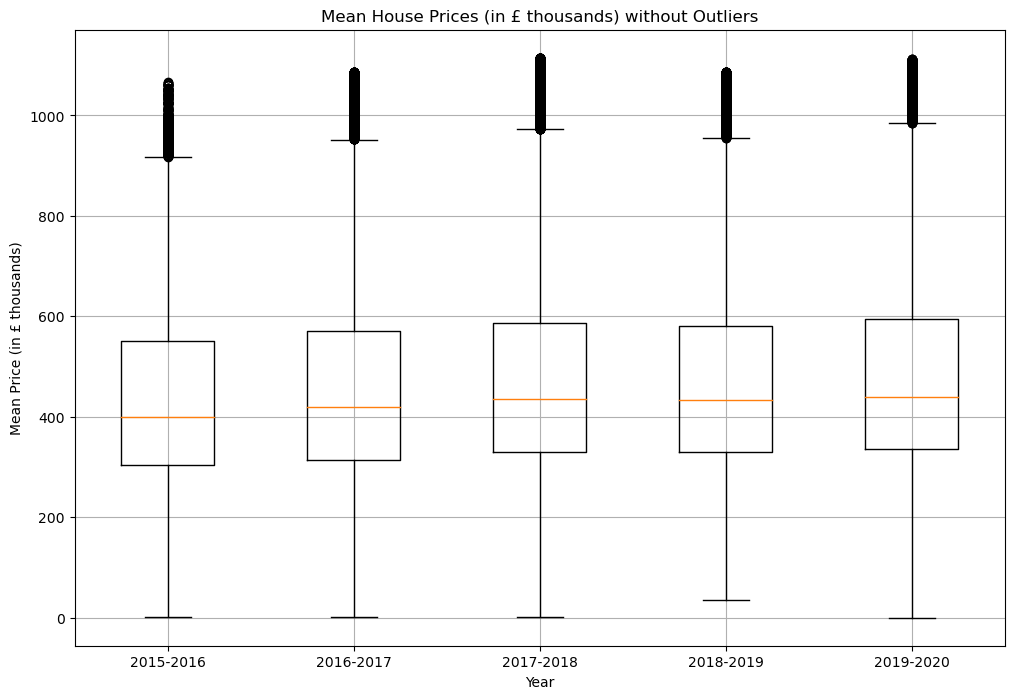

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# List of interval labels
interval_labels = ['March 2015 - February 2016',
                   'March 2016 - February 2017',
                   'March 2017 - February 2018',
                   'March 2018 - February 2019',
                   'March 2019 - February 2020']

# Initialize an empty list to store all data without outliers
all_data_no_outliers = []
years = []

# Loop over each interval
for interval_label in interval_labels:
    # Filter the DataFrame for the specified interval
    df_interval = df_copy[df_copy['Interval'] == interval_label]
    years.append(interval_label.split()[1]+ '-'+ interval_label.split()[4])
    # Extract the price data for the interval and divide by 1000
    data = df_interval['price'] / 1000  # Divide by 1000 to convert to thousands of pounds

    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove outliers from the data
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

    # Add data without outliers to the list
    all_data_no_outliers.append(data_no_outliers)

# Create the box plot with all intervals on the same graph
plt.figure(figsize=(12, 8))
plt.boxplot(all_data_no_outliers, labels=years)  # Use years for x-axis labels

# Add title, labels, and grid
plt.title('Mean House Prices (in £ thousands) without Outliers')
plt.xlabel('Year')
plt.ylabel('Mean Price (in £ thousands)')
plt.grid(True)

# Show the plot
plt.show()

This box plot demonstrates general change in the prices of the property sold based on intervals and independent of other variables. The average price of property sold increased each year, except time period between March 2018 and March 2019, when it clearly dropped. There was more variability in prices paid between March 2015 and March 2016 compared to other years, whereas time periods between 2016 and 2017 or 2018 and 2019 indicate that monthly average prices paid are closer to the median values. All values fall in range between 550 and 650 thousand pounds.

In [25]:
# Calculate percentage change of mean price from one interval to the other
grouped_df = df_copy.groupby(['Property_Type', 'Before/After', 'Old/New'])

# Calculate the mean price for each group
mean_price = grouped_df['price'].mean()

# Unstack the 'Before/After' level to pivot it into columns
mean_price_unstacked = mean_price.unstack(level='Before/After')

# Calculate the percentage change
percentage_change = ((mean_price_unstacked['After'] - mean_price_unstacked['Before']) / mean_price_unstacked['Before']) * 100

# Rename the Series
percentage_change = percentage_change.rename('Mean_Percent_Change')

# Reset index to get 'Old/New' back as a column
percentage_change = percentage_change.reset_index()

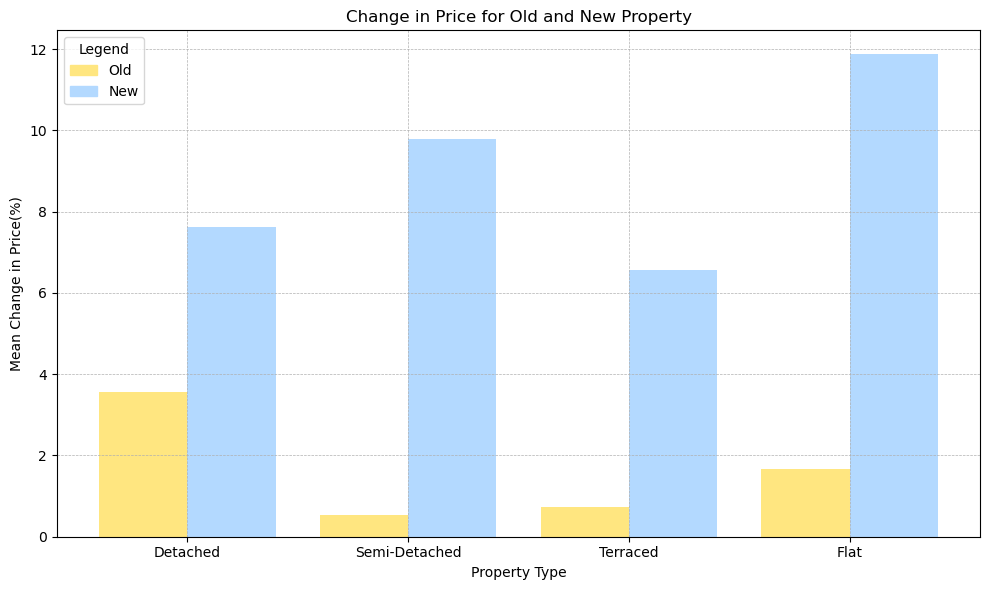

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
type_order = percentage_change['Property_Type'].unique()
age = percentage_change['Old/New'].unique()

# Set colors for N and Y bars
colors = {'Y': '#b3d9ff', 'N': '#ffe680'}

bar_width = 0.4

for i in range(len(type_order)):
    p_type = type_order[i]
    p_data = percentage_change[percentage_change['Property_Type'] == p_type]
    n_values = p_data[p_data['Old/New'] == 'N']['Mean_Percent_Change'].values
    y_values = p_data[p_data['Old/New'] == 'Y']['Mean_Percent_Change'].values
    ax.bar([i - bar_width / 2] * len(n_values), n_values, width=bar_width, color=colors['N'], label='Old')
    ax.bar([i + bar_width / 2] * len(y_values), y_values, width=bar_width, color=colors['Y'], label='New')
    
ax.set_xticks(range(len(type_order)))
ax.set_xticklabels(['Detached', 'Semi-Detached', 'Terraced', 'Flat'])

legend_handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in ['N', 'Y']]
ax.legend(legend_handles, ['Old', 'New'], title='Legend')

ax.set_ylabel('Mean Change in Price(%)')
ax.set_xlabel('Property Type')
ax.set_title('Change in Price for Old and New Property')

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

This graph compares the growth rates for prices of old and new property purchases. When there was a positive change in the price paid for one type of property, the other type experienced a decrease. Newly-built properties have seen the highest spike in prices paid of almost 50% growth between March 2017 and March 2018, with relatively high growth during consecutive intervals, though at a decreasing rate.

## The Message

In [101]:
df_difference = pd.concat([df_cardiff, df_copy])
group_means = df_difference.groupby(['Property_Type', 'Old/New','County', 'Before/After'])['price'].mean().unstack()
pd.DataFrame(group_means)
print(group_means)

Before/After                                 After        Before
Property_Type Old/New County                                    
D             N       CARDIFF         3.942072e+05  3.723358e+05
                      GREATER LONDON  1.089762e+06  1.052249e+06
              Y       CARDIFF         3.848022e+05  4.145890e+05
                      GREATER LONDON  8.600746e+05  7.991435e+05
F             N       CARDIFF         1.462274e+05  1.420553e+05
                      GREATER LONDON  4.998876e+05  4.972318e+05
              Y       CARDIFF         1.960851e+05  1.901574e+05
                      GREATER LONDON  6.895359e+05  6.279952e+05
S             N       CARDIFF         2.505625e+05  2.363838e+05
                      GREATER LONDON  6.486275e+05  6.438933e+05
              Y       CARDIFF         2.395957e+05  2.302824e+05
                      GREATER LONDON  6.585691e+05  6.179731e+05
T             N       CARDIFF         2.125906e+05  1.932427e+05
                      GRE

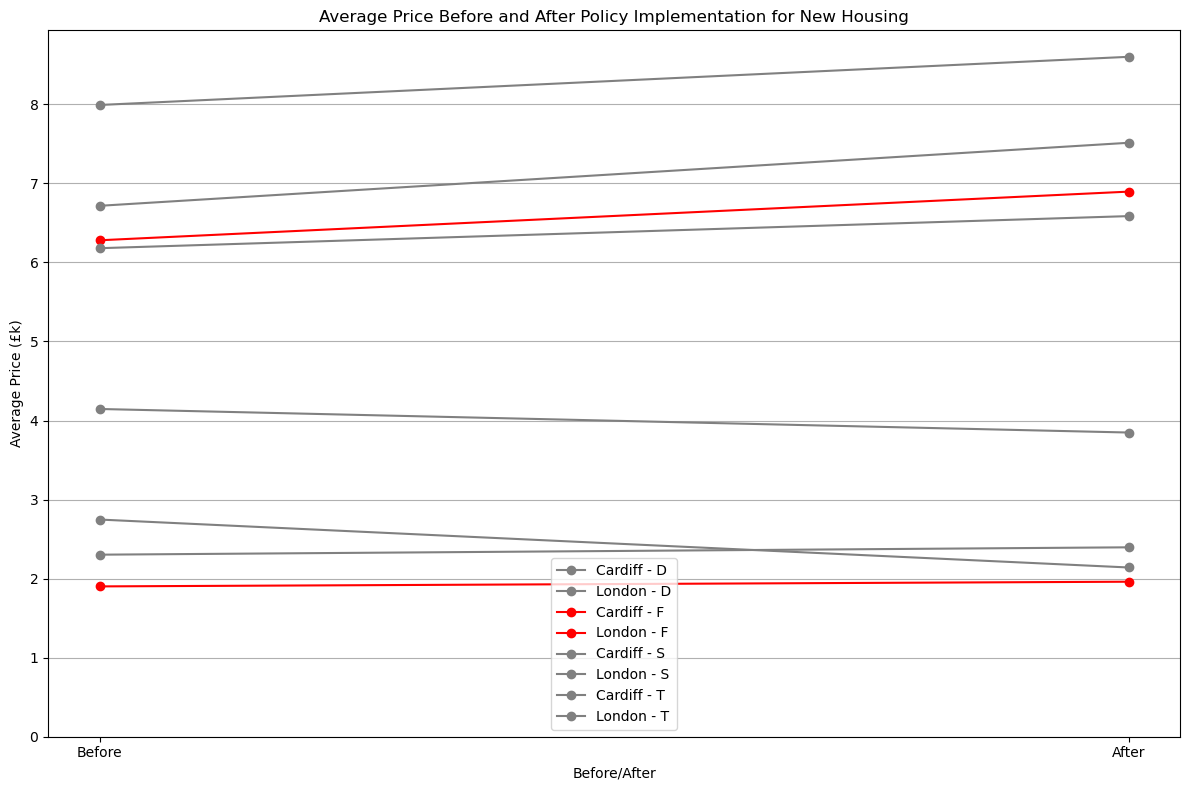

In [122]:
# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each combination of property type and Old/New
for property_type in group_means.index.levels[0]:
    # Extract the data for the current combination
    cardiff_combination_data = cardiff_data.loc[(property_type, 'Y')]
    london_combination_data = london_data.loc[(property_type, 'Y')]

    # Calculate the mean price before and after the policy implementation for Cardiff and London
    cardiff_before_mean = cardiff_combination_data['Before'].mean() / 100000  # Divide by 1000
    cardiff_after_mean = cardiff_combination_data['After'].mean() / 100000  # Divide by 1000
    london_before_mean = london_combination_data['Before'].mean() / 100000  # Divide by 1000
    london_after_mean = london_combination_data['After'].mean() / 100000  # Divide by 1000

    # Set line color based on property type
    if property_type == 'F':
        color = 'red'  # Red for flats
    else:
        color = 'grey'  # Grey for other property types

    # Plotting the line for Cardiff
    plt.plot(['Before', 'After'], [cardiff_before_mean, cardiff_after_mean], marker='o', linestyle='-', color=color, label=f'Cardiff - {property_type}')
    # Plotting the line for London
    plt.plot(['Before', 'After'], [london_before_mean, london_after_mean], marker='o', linestyle='-', color=color, label=f'London - {property_type}')

# Plot settings
plt.title('Average Price Before and After Policy Implementation for New Housing')
plt.xlabel('Before/After')
plt.ylabel('Average Price (£k)')  # Update y-axis label
plt.legend()
plt.grid(axis='y')
plt.ylim(0, None)  # Set y-axis lower limit to 0
plt.tight_layout()
plt.show()

The UK government intervention intensified increase in demand and consequentially increase in prices of newly-built flats compared to housing market changes for other property types.

In [27]:
import geopandas as gpd

file_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp"
district_df = gpd.read_file(file_path)

district_df.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."


In [28]:
df_maps = df_copy.groupby(['Interval', 'District'])['price'].mean()
df_maps = df_maps.reset_index()
df_maps = df_maps.rename(columns={'price': 'Price_Mean', 'District': 'DISTRICT'})

In [29]:
interval1 = 'March 2015 - February 2016'
interval2 = 'March 2019 - February 2020'
df_interval1 = df_maps[df_maps['Interval'] == interval1]
df_interval2 = df_maps[df_maps['Interval'] == interval2]

# Merge the two DataFrames based on the 'DISTRICT' column
merged_df = pd.merge(df_interval1, df_interval2, on='DISTRICT', suffixes=('_interval1', '_interval2'))

# Calculate the percentage change in price
merged_df['Percentage_Change'] = ((merged_df['Price_Mean_interval2'] - 
                                   merged_df['Price_Mean_interval1']) / merged_df['Price_Mean_interval1']) * 100

# Create a new DataFrame with 'DISTRICT' and 'Percentage_Change' columns
percentage_change_df = merged_df[['DISTRICT', 'Percentage_Change']]

In [30]:
district_df["DISTRICT"] = district_df["DISTRICT"].str.title()
district_df["DISTRICT"] = district_df["DISTRICT"].str.strip()
# Corrected assignment using .loc
percentage_change_df.loc[:, "DISTRICT"] = percentage_change_df["DISTRICT"].str.title()
percentage_change_df.loc[:, "DISTRICT"] = percentage_change_df["DISTRICT"].str.strip()

In [31]:
districts = district_df.merge(percentage_change_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

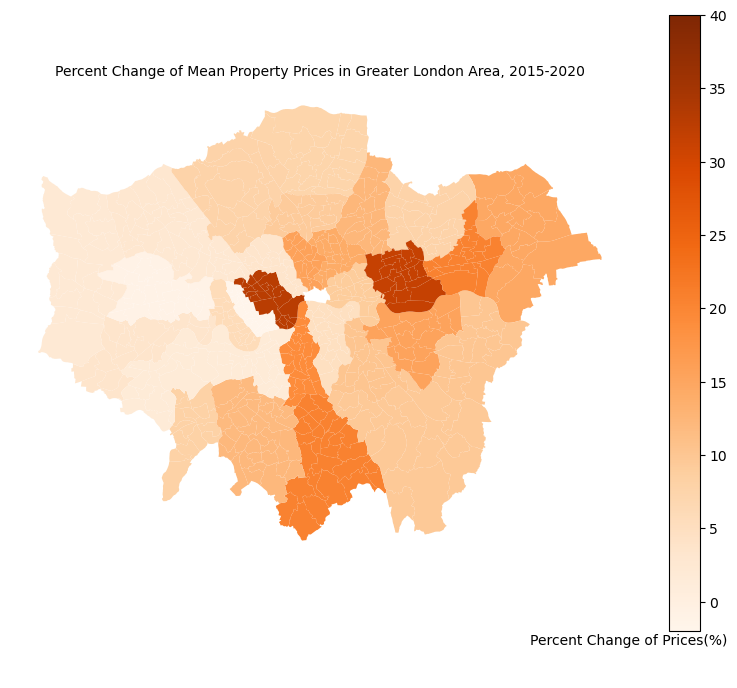

In [32]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Percentage_Change', legend=True, cmap='Oranges',
    vmin=-2, vmax=40
)


gax.annotate('Percent Change of Prices(%)', xy=(0.53, 0.055), xycoords='figure fraction')
gax.set_title("Percent Change of Mean Property Prices in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

In [107]:
total_purchases_district = df_copy.groupby('District').size()
flats_district = df_copy[df_copy['Property_Type'] == 'F'].groupby('District').size()
percentage_flat_district = (flats_district / total_purchases_district) * 100
percentage_flat_district_df = pd.DataFrame({
    'DISTRICT': percentage_flat_district.index,
    'Share of Flats': percentage_flat_district.values
})

In [109]:
district_df["DISTRICT"] = district_df["DISTRICT"].str.title().str.strip()
percentage_flat_district_df["DISTRICT"] = percentage_change_df["DISTRICT"].str.title().str.strip()
districts_flats = district_df.merge(percentage_flat_district_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

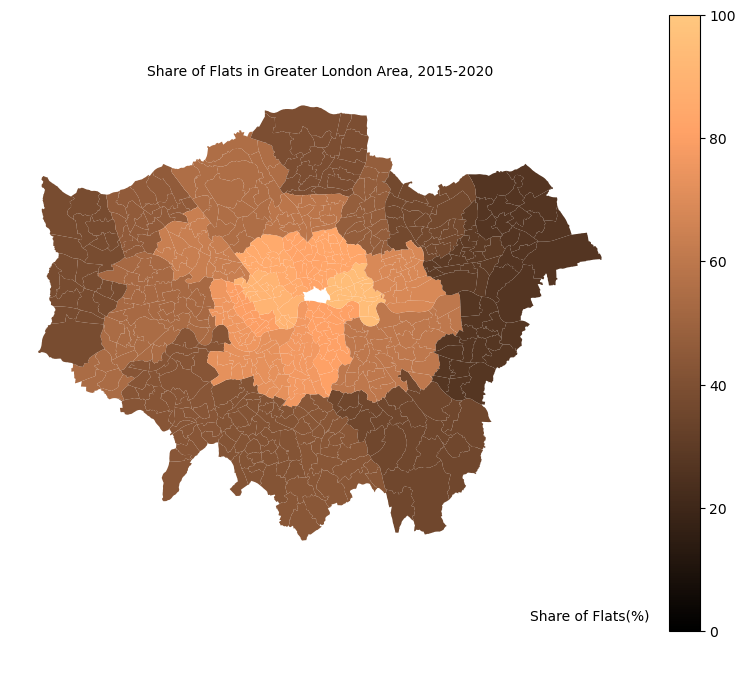

In [110]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_flats.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Share of Flats', legend=True, cmap='copper',
    vmin=0, vmax=100
)


gax.annotate('Share of Flats(%)', xy=(0.53, 0.07), xycoords='figure fraction')
gax.set_title("Share of Flats in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

In [36]:
#share of new property sold
new_district = df_copy[df_copy['Old/New'] == 'Y'].groupby('District').size()
percentage_new_district = (new_district / total_purchases_district) * 100
percentage_new_district_df = pd.DataFrame({
    'DISTRICT': percentage_flat_district.index,
    'Percentage of New Property': percentage_new_district.values
})

In [37]:
percentage_new_district_df["DISTRICT"] = percentage_change_df["DISTRICT"].str.title().str.strip()
districts_new = district_df.merge(percentage_new_district_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

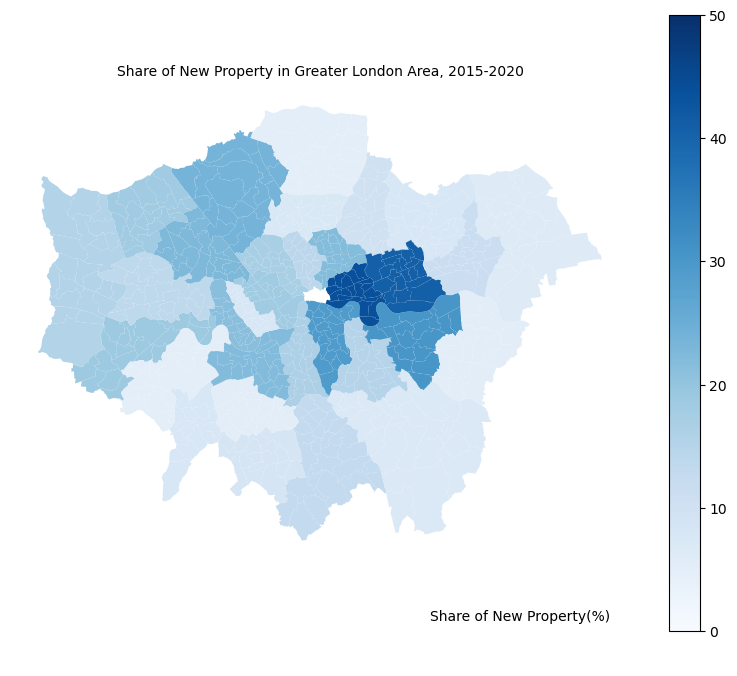

In [38]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_new.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Percentage of New Property', legend=True, cmap='Blues',
    vmin=0, vmax=50
)


gax.annotate('Share of New Property(%)', xy=(0.43, 0.07), xycoords='figure fraction')
gax.set_title("Share of New Property in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

In [39]:
#map 4, average price of property in london district
grouped_district_mean = df_copy.groupby('District')['price'].mean().reset_index()
grouped_district_mean = grouped_district_mean.rename(columns={'price': 'Price_Mean', 'District': 'DISTRICT'})
# Convert 'price' column to mean integers and then divide by 1000
grouped_district_mean['Price_Mean'] = (grouped_district_mean['Price_Mean'].astype(int) // 1000)
# Rename the column to reflect the division by a thousand
grouped_district_mean = grouped_district_mean.rename(columns={'Price_Mean': 'Price_Mean (in thousands)'})

In [40]:
grouped_district_mean["DISTRICT"] = grouped_district_mean["DISTRICT"].str.title().str.strip()
districts_price = district_df.merge(grouped_district_mean, left_on="DISTRICT", right_on="DISTRICT", how="inner")

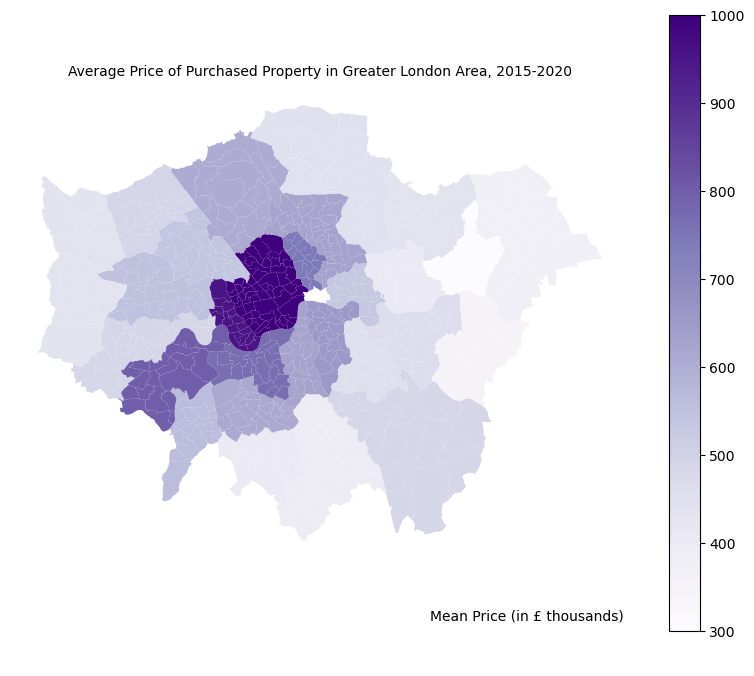

In [41]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_price.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Price_Mean (in thousands)', legend=True, cmap='Purples',
    vmin=300, vmax=1000
)


gax.annotate('Mean Price (in £ thousands)', xy=(0.43, 0.07), xycoords='figure fraction')
gax.set_title("Average Price of Purchased Property in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

# Merging data sets

In [42]:
# Specify the path to the CSV file
new_dataset_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/ward-profiles-excel-version.csv"

# Define the column names
colnames_new = ['Ward name', 'Old code', 'New code', 'Population - 2015', 'Children aged 0-15 - 2015', 'Working-age (16-64) - 2015', 'Older people aged 65+ - 2015', '% All Children aged 0-15 - 2015', '% All Working-age (16-64) - 2015', '% All Older people aged 65+ - 2015', 'Mean Age - 2013', 'Median Age - 2013', 'Area - Square Kilometres', 'Population density (persons per sq km) - 2013', '% BAME - 2011', '% Not Born in UK - 2011', '% English is First Language of no one in household - 2011', 'General Fertility Rate - 2013', 'Male life expectancy -2009-13', 'Female life expectancy -2009-13', '% children in reception year who are obese - 2011/12 to 2013/14', '% children in year 6 who are obese- 2011/12 to 2013/14', 'Rate of All Ambulance Incidents per 1,000 population - 2014', 'Rates of ambulance call outs for alcohol related illness - 2014', 'Number Killed or Seriously Injured on the roads - 2014', 'In employment (16-64) - 2011', 'Employment rate (16-64) - 2011', 'Number of jobs in area - 2013', 'Employment per head of resident WA population - 2013', 'Rate of new registrations of migrant workers - 2011/12', 'Median House Price (£) - 2014', 'Number of properties sold - 2014', 'Median Household income estimate (2012/13)', 'Number of Household spaces - 2011', '% detached houses - 2011', '% semi-detached houses - 2011', '% terraced houses - 2011', '% Flat, maisonette or apartment - 2011', '% Households Owned - 2011', '% Households Social Rented - 2011', '% Households Private Rented - 2011', '% dwellings in council tax bands A or B - 2015', '% dwellings in council tax bands C, D or E - 2015', '% dwellings in council tax bands F, G or H - 2015', 'Claimant rate of key out-of-work benefits (working age client group) (2014)', 'Claimant Rate of Housing Benefit (2015)', 'Claimant Rate of Employment Support Allowance - 2014', 'Rate of JobSeekers Allowance (JSA) Claimants - 2015', '% dependent children (0-18) in out-of-work households - 2014', '% of households with no adults in employment with dependent children - 2011', '% of lone parents not in employment - 2011', '(ID2010) - Rank of average score (within London) - 2010', '(ID2010) % of LSOAs in worst 50% nationally - 2010', 'Average GCSE capped point scores - 2014', 'Unauthorised Absence in All Schools (%) - 2013', '% with no qualifications - 2011', '% with Level 4 qualifications and above - 2011', 'A-Level Average Point Score Per Student - 2013/14', 'A-Level Average Point Score Per Entry; 2013/14', 'Crime rate - 2014/15', 'Violence against the person rate - 2014/15', 'Deliberate Fires per 1,000 population - 2014', '% area that is open space - 2014', 'Cars per household - 2011', 'Average Public Transport Accessibility score - 2014', '% travel by bicycle to work - 2011', 'Turnout at Mayoral election - 2012']

# Read the CSV file with specified encoding
df_new = pd.read_csv(new_dataset_path, header=None, names=colnames_new, encoding='ISO-8859-1')

In [43]:
unique_districts = district_df['DISTRICT'].unique()
# Filter the DataFrame to keep only the rows with specified ward values
filtered_df_new = df_new[df_new['Ward name'].isin(unique_districts)]
df_new_renamed = filtered_df_new.rename(columns={'Ward name': 'District'})
df_copy["District"] = df_copy["District"].str.title().str.strip()
# Print the filtered DataFrame
# Rename the 'Ward name' column to 'District'
new_merged_df = pd.merge(df_copy, df_new_renamed, on='District')

## Conclusion

In conclusion, this research highlights the nuanced dynamics of the housing market in the Greater London Area before and after the introduction of the First Time Buyers' Relief by the UK government. The analysis underscores significant disparities in price dynamics across property types, with detached houses consistently displaying higher prices compared to flats. While the overall average property prices experienced an upward trend over the five-year interval, a notable decline in mean prices was observed between March 2018 and March 2019. Despite the documentation of several high-value property transactions, the majority of properties sold were valued at less than 800 thousand pounds. These findings underscore the complex nature of housing market dynamics and suggest the need for further exploration to analyse the impact of targeted interventions that address affordability challenges and foster equitable access to housing.

## References

1. Bolster, A. (2011). Evaluating the Impact of Stamp Duty Land Tax First Time Buyer’s Relief.. https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=dbc6dd9a2a
67fcd3e76bd3ed699d3533de147d24
2. Bone, J., & O’Reilly, K. (2010). No place called home: the causes and social consequences of the UK housing 'bubble.' The British Journal of Sociology, 61(2), 231–255. https://doi.org/10.1111/j.1468-4446.2010.01311.x
3. HM Land Registry Open Data. (2023). Landregistry.data.gov.uk. https://landregistry.data.gov.uk/
4. Sabater, A., & Finney, N. (2022). Age segregation and housing unaffordability: Generational divides in housing opportunities and spatial polarisation in England and Wales. Urban Studies. https://doi.org/10.1177/00420980221121088
5. Szumilo, N. (2018). The spatial consequences of the housing affordability crisis in England. Environment and Planning A: Economy and Space, 51(6), 1264–1286. https://doi.org/10.1177/0308518x18811671